In [9]:
# Quantum Circuit Reconstruction Analysis
# This notebook visualizes reconstructed expectation values from circuit cutting experiments
# with and without Dynamical Decoupling (DD).

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
csv_path = "CC+DD - experiment.csv"  # Make sure this CSV is in the same directory
df = pd.read_csv(csv_path)

# Preview the data
df.head()


,method,dd_sequence,expectation value,reconstructed expectation value,num_qubits,qps,cuts,sampling_overhead,depth,avg_subcircuit_depth,"method, label, submit_time, exec_secs"
0,ideal_full_no_dd,XY4,0.738421,NaN,7.0,1.0,0.0,1.000000e+00,14.0,NaN,NaN
1,noisy_full_no_dd,XY4,0.765437,NaN,7.0,1.0,0.0,1.000000e+00,14.0,NaN,NaN
2,ideal_cut_no_dd,XY4,NaN,8046.729342,7.0,1.0,12.0,2.824295e+11,NaN,6.0,"cut_no_dd_ideal,0,0.002459287643432617,0.02956..."
3,noisy_cut_no_dd,XY4,NaN,8319.029347,7.0,1.0,12.0,2.824295e+11,NaN,6.0,"cut_no_dd,0,0.002662181854248047,0.02016830444..."
4,noisy_cut_with_dd_after,XY4,NaN,-487.498278,7.0,1.0,12.0,2.824295e+11,NaN,6.0,"cut_with_dd_after,0,0.005754947662353516,0.146..."


In [10]:
# Filter out rows with missing reconstructed expectation values
filtered_df = df.dropna(subset=["reconstructed expectation value", "method"])
filtered_df


,method,dd_sequence,expectation value,reconstructed expectation value,num_qubits,qps,cuts,sampling_overhead,depth,avg_subcircuit_depth,"method, label, submit_time, exec_secs"
2,ideal_cut_no_dd,XY4,NaN,8046.729342,7.0,1.0,12.0,2.824295e+11,NaN,6.000000,"cut_no_dd_ideal,0,0.002459287643432617,0.02956..."
3,noisy_cut_no_dd,XY4,NaN,8319.029347,7.0,1.0,12.0,2.824295e+11,NaN,6.000000,"cut_no_dd,0,0.002662181854248047,0.02016830444..."
4,noisy_cut_with_dd_after,XY4,NaN,-487.498278,7.0,1.0,12.0,2.824295e+11,NaN,6.000000,"cut_with_dd_after,0,0.005754947662353516,0.146..."
5,noisy_cut_with_dd_before,XY4,NaN,2901.901379,7.0,1.0,12.0,2.824295e+11,NaN,17.428571,"cut_with_dd_before,0,0.002330303192138672,0.21..."
9,ideal_cut_no_dd,XY4,NaN,5154.027753,7.0,1.0,12.0,2.824295e+11,NaN,6.000000,"cut_no_dd_ideal,0,0.004676342010498047,0.15889..."
...,...,...,...,...,...,...,...,...,...,...,...
117,noisy_cut_with_dd_before,XY4,NaN,-3.186455,7.0,6.0,2.0,8.100000e+01,NaN,29.500000,"cut_with_dd_before,0,0.0026557445526123047,12...."
121,ideal_cut_no_dd,XY4,NaN,-2.381857,7.0,6.0,2.0,8.100000e+01,NaN,9.500000,"cut_no_dd_ideal,0,0.0061798095703125,0.0272495..."
122,noisy_cut_no_dd,XY4,NaN,-2.327588,7.0,6.0,2.0,8.100000e+01,NaN,9.500000,"cut_no_dd,0,0.002805948257446289,0.02569317817..."
123,noisy_cut_with_dd_after,XY4,NaN,-0.730611,7.0,6.0,2.0,8.100000e+01,NaN,23.500000,"cut_with_dd_after,0,0.002537965774536133,12.02..."


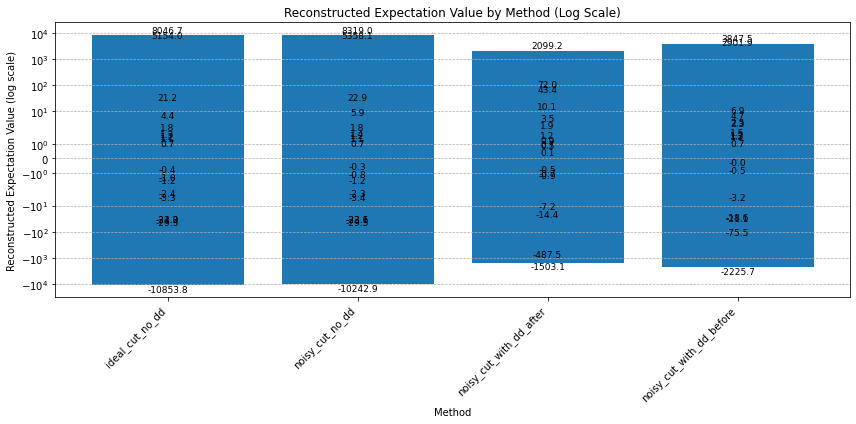

In [4]:
# Set up the figure
plt.figure(figsize=(12, 6))

# Create the bar plot
bars = plt.bar(
    filtered_df["method"],
    filtered_df["reconstructed expectation value"]
)

# Use a symmetrical log scale to show both large positive and negative values
plt.yscale("symlog")

# Add titles and labels
plt.title("Reconstructed Expectation Value by Method (Log Scale)")
plt.xlabel("Method")
plt.ylabel("Reconstructed Expectation Value (log scale)")
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)

# Annotate each bar with the exact value
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1f}',
        ha='center',
        va='bottom' if height > 0 else 'top',
        fontsize=9
    )

plt.tight_layout()
plt.show()


In [5]:
# Drop rows with missing reconstructed values or method
filtered_df = df.dropna(subset=["reconstructed expectation value", "method"])

# Exclude rows where qps == 1 (these often have unrealistically high values)
filtered_df = filtered_df[filtered_df["qps"] != 1]


In [6]:
# Select relevant columns
summary_df = filtered_df[[
    "method", "dd_sequence", "reconstructed expectation value",
    "num_qubits", "cuts", "avg_subcircuit_depth", "sampling_overhead"
]].copy()

# Rename columns for display
summary_df.columns = [
    "Method", "DD Sequence", "Reconstructed ⟨H⟩",
    "#Qubits", "#Cuts", "Avg Subcircuit Depth", "Sampling Overhead"
]

# Round and format for clarity
summary_df["Reconstructed ⟨H⟩"] = summary_df["Reconstructed ⟨H⟩"].round(2)
summary_df["Sampling Overhead"] = summary_df["Sampling Overhead"].apply(lambda x: f"{x:.2e}")
summary_df["Avg Subcircuit Depth"] = summary_df["Avg Subcircuit Depth"].round(1)

# Show the summary
summary_df


,Method,DD Sequence,Reconstructed ⟨H⟩,#Qubits,#Cuts,Avg Subcircuit Depth,Sampling Overhead
23,ideal_cut_no_dd,XY4,21.18,7.0,6.0,7.5,5.31e+05
24,noisy_cut_no_dd,XY4,22.87,7.0,6.0,7.5,5.31e+05
25,noisy_cut_with_dd_after,XY4,72.03,7.0,6.0,16.5,5.31e+05
26,noisy_cut_with_dd_before,XY4,-18.64,7.0,6.0,21.5,5.31e+05
30,ideal_cut_no_dd,NaN,4.40,7.0,6.0,7.5,5.31e+05
31,noisy_cut_no_dd,NaN,5.93,7.0,6.0,7.5,5.31e+05
32,noisy_cut_with_dd_after,NaN,43.44,7.0,6.0,16.5,5.31e+05
33,noisy_cut_with_dd_before,NaN,-75.53,7.0,6.0,21.5,5.31e+05
37,ideal_cut_no_dd,XY4,-22.19,7.0,6.0,7.5,5.31e+05
38,noisy_cut_no_dd,XY4,-22.58,7.0,6.0,7.5,5.31e+05


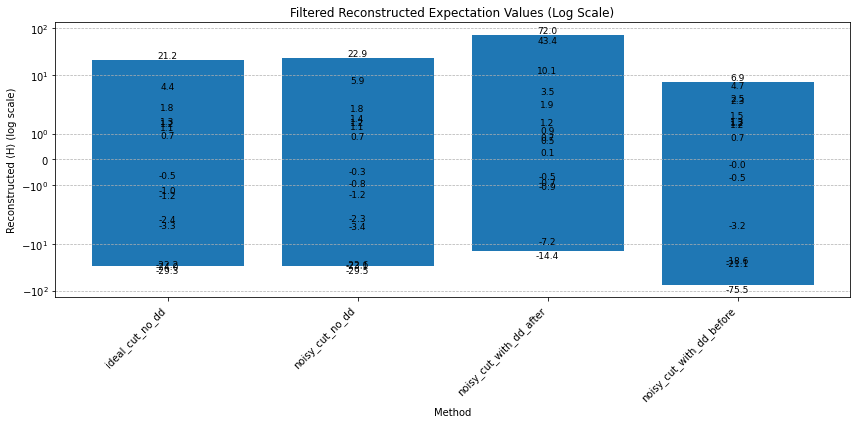

In [7]:
# Bar plot of reconstructed values (filtered set)
plt.figure(figsize=(12, 6))
bars = plt.bar(
    summary_df["Method"],
    summary_df["Reconstructed ⟨H⟩"]
)

plt.yscale("symlog")  # Show large negative/positive values clearly
plt.title("Filtered Reconstructed Expectation Values (Log Scale)")
plt.xlabel("Method")
plt.ylabel("Reconstructed ⟨H⟩ (log scale)")
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1f}',
        ha='center',
        va='bottom' if height > 0 else 'top',
        fontsize=9
    )

plt.tight_layout()
plt.show()


In [11]:
# Pull out ideal and noisy no-DD for reference
ideal_value = summary_df[summary_df["Method"] == "ideal_cut_no_dd"]["Reconstructed ⟨H⟩"].values[0]
baseline_noisy_value = summary_df[summary_df["Method"] == "noisy_cut_no_dd"]["Reconstructed ⟨H⟩"].values[0]

# Add absolute error column relative to ideal
summary_df["Abs Error from Ideal"] = (summary_df["Reconstructed ⟨H⟩"] - ideal_value).abs()

# Sort by increasing error (best methods at the top)
summary_df.sort_values("Abs Error from Ideal")


,Method,DD Sequence,Reconstructed ⟨H⟩,#Qubits,#Cuts,Avg Subcircuit Depth,Sampling Overhead,Abs Error from Ideal
23,ideal_cut_no_dd,XY4,21.18,7.0,6.0,7.5,5.31e+05,0.00
24,noisy_cut_no_dd,XY4,22.87,7.0,6.0,7.5,5.31e+05,1.69
53,noisy_cut_with_dd_after,XY4,10.05,7.0,4.0,19.3,6.56e+03,11.13
47,noisy_cut_with_dd_before,XY4,6.92,7.0,4.0,24.7,6.56e+03,14.26
31,noisy_cut_no_dd,NaN,5.93,7.0,6.0,7.5,5.31e+05,15.25
124,noisy_cut_with_dd_before,XY4,4.71,7.0,2.0,29.5,8.10e+01,16.47
30,ideal_cut_no_dd,NaN,4.40,7.0,6.0,7.5,5.31e+05,16.78
81,noisy_cut_with_dd_after,XY4,3.55,7.0,2.0,28.5,8.10e+01,17.63
61,noisy_cut_with_dd_before,XY4,2.52,7.0,4.0,24.7,6.56e+03,18.66
82,noisy_cut_with_dd_before,XY4,2.29,7.0,2.0,30.5,8.10e+01,18.89


In [12]:
import pandas as pd

# Load CSV
df = pd.read_csv("CC+DD - experiment.csv")

# Extract log entries from metadata column
all_logs = []

for cell in df["method, label, submit_time, exec_secs"].dropna():
    lines = str(cell).split("\n")
    for line in lines:
        parts = line.split(",")
        if len(parts) == 4:
            method, label, submit_time, exec_secs = parts
            all_logs.append({
                "method": method.strip(),
                "exec_secs": float(exec_secs.strip())
            })

# Create DataFrame from parsed logs
log_df = pd.DataFrame(all_logs)

# Preview
log_df.head()


,method,exec_secs
0,cut_no_dd_ideal,0.029561
1,cut_no_dd_ideal,0.018340
2,cut_no_dd_ideal,0.170028
3,cut_no_dd_ideal,0.137045
4,cut_no_dd_ideal,0.019445


In [13]:
# Compute execution time stats by method
exec_summary = log_df.groupby("method")["exec_secs"].agg(
    N="count", 
    Mean="mean", 
    StdDev="std", 
    Min="min", 
    Max="max"
).reset_index()

# Round for readability
exec_summary[["Mean", "StdDev", "Min", "Max"]] = exec_summary[["Mean", "StdDev", "Min", "Max"]].round(4)

# Display the summary table
exec_summary


,method,N,Mean,StdDev,Min,Max
0,cut_no_dd,575,0.4380,1.8024,0.0065,14.2269
1,cut_no_dd_ideal,576,0.3093,1.0871,0.0164,7.6865
2,cut_with_dd_after,572,0.5187,1.9741,0.0037,13.4496
3,cut_with_dd_before,578,0.4945,1.8961,0.0169,13.7866


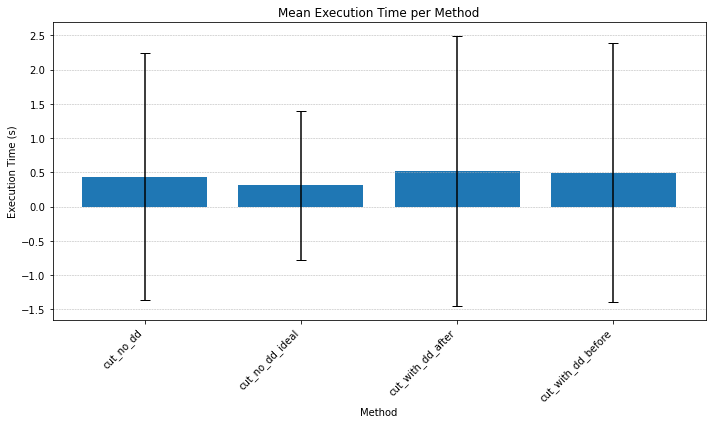

In [14]:
import matplotlib.pyplot as plt

# Plot mean execution time with standard deviation as error bars
plt.figure(figsize=(10, 6))
plt.bar(exec_summary["method"], exec_summary["Mean"], yerr=exec_summary["StdDev"], capsize=5)

plt.title("Mean Execution Time per Method")
plt.xlabel("Method")
plt.ylabel("Execution Time (s)")
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd

# Load data
df = pd.read_csv("CC+DD - experiment.csv")

# Prepare for extraction
log_entries = []

# Iterate and extract logs with QPS value
for _, row in df[["method", "qps", "method, label, submit_time, exec_secs"]].dropna().iterrows():
    qps = row["qps"]
    lines = str(row["method, label, submit_time, exec_secs"]).split("\n")
    for line in lines:
        parts = line.split(",")
        if len(parts) == 4:
            method, label, submit_time, exec_secs = parts
            log_entries.append({
                "method": method.strip(),
                "qps": qps,
                "exec_secs": float(exec_secs.strip())
            })

# Create DataFrame
log_df = pd.DataFrame(log_entries)

# Preview
log_df.head()


,method,qps,exec_secs
0,cut_no_dd_ideal,1.0,0.029561
1,cut_no_dd_ideal,1.0,0.018340
2,cut_no_dd_ideal,1.0,0.170028
3,cut_no_dd_ideal,1.0,0.137045
4,cut_no_dd_ideal,1.0,0.019445


In [16]:
# Group and aggregate statistics
qps_summary = log_df.groupby(["qps", "method"])["exec_secs"].agg(
    N="count",
    Mean="mean",
    StdDev="std",
    Min="min",
    Max="max"
).reset_index()

# Round for display
qps_summary[["Mean", "StdDev", "Min", "Max"]] = qps_summary[["Mean", "StdDev", "Min", "Max"]].round(4)

# Display summary
qps_summary


,qps,method,N,Mean,StdDev,Min,Max
0,1.0,cut_no_dd,210,0.1251,0.0736,0.0078,0.3301
1,1.0,cut_no_dd_ideal,210,0.1202,0.0701,0.0167,0.3612
2,1.0,cut_with_dd_after,210,0.1360,0.0655,0.0168,0.2465
3,1.0,cut_with_dd_before,210,0.1331,0.0740,0.0173,0.2534
4,2.0,cut_no_dd,120,0.1250,0.0992,0.0167,0.2916
5,2.0,cut_no_dd_ideal,120,0.1118,0.0875,0.0165,0.2459
6,2.0,cut_with_dd_after,120,0.1365,0.1020,0.0166,0.3201
7,2.0,cut_with_dd_before,120,0.1382,0.0962,0.0171,0.2809
8,3.0,cut_no_dd,90,0.1355,0.1371,0.0170,0.4000
9,3.0,cut_no_dd_ideal,90,0.1152,0.1097,0.0164,0.3205


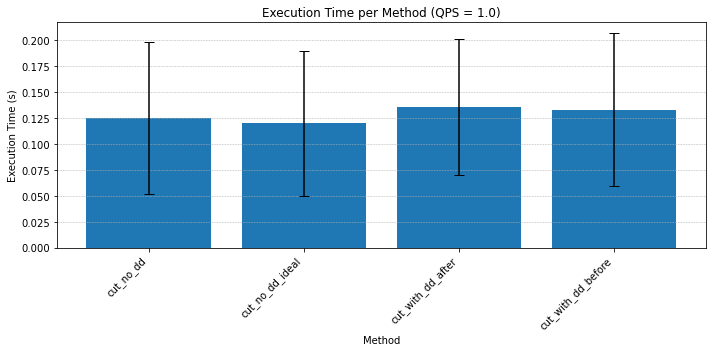

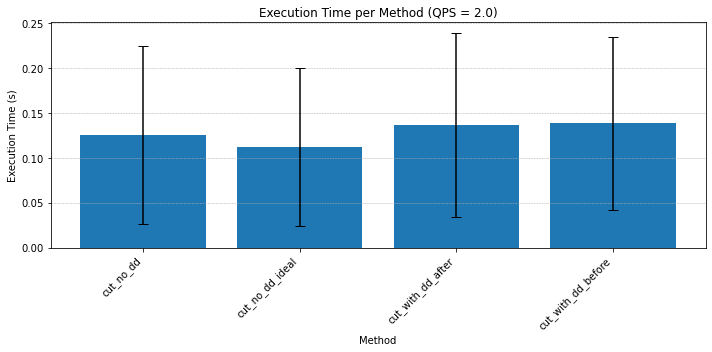

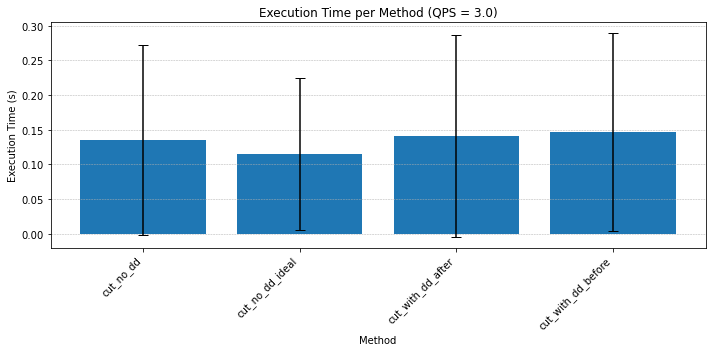

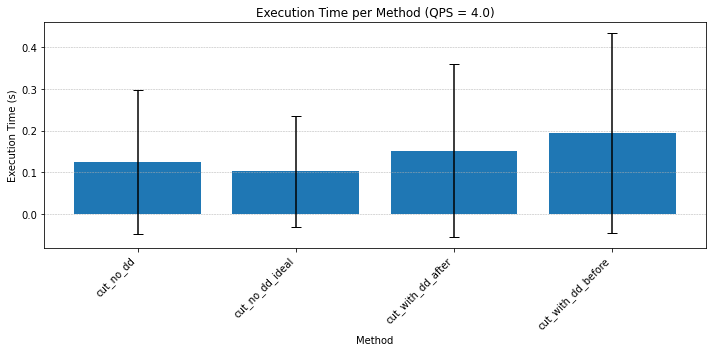

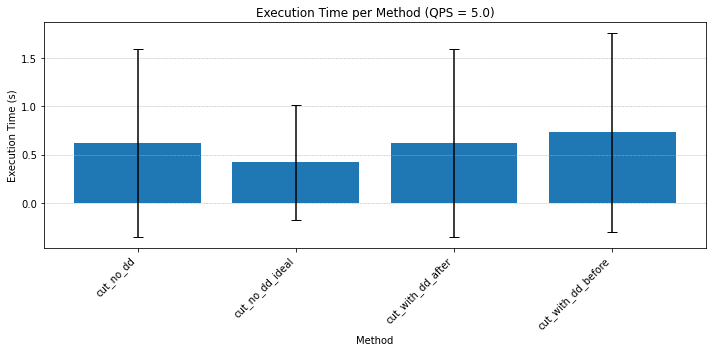

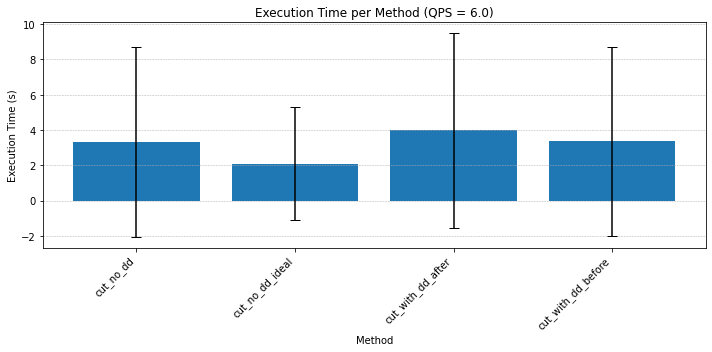

In [17]:
import matplotlib.pyplot as plt

# Unique QPS values
qps_values = sorted(log_df["qps"].unique())

# Plot one chart per QPS
for qps in qps_values:
    subset = qps_summary[qps_summary["qps"] == qps]
    
    plt.figure(figsize=(10, 5))
    plt.bar(
        subset["method"], 
        subset["Mean"], 
        yerr=subset["StdDev"], 
        capsize=5
    )
    
    plt.title(f"Execution Time per Method (QPS = {qps})")
    plt.xlabel("Method")
    plt.ylabel("Execution Time (s)")
    plt.xticks(rotation=45, ha="right")
    plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


In [18]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("CC+DD - experiment.csv")

# Extract logs with QPS and execution time from metadata
log_entries = []

for _, row in df[["method", "qps", "method, label, submit_time, exec_secs"]].dropna().iterrows():
    qps = row["qps"]
    lines = str(row["method, label, submit_time, exec_secs"]).split("\n")
    for line in lines:
        parts = line.split(",")
        if len(parts) == 4:
            method, label, submit_time, exec_secs = parts
            log_entries.append({
                "method": method.strip(),
                "qps": qps,
                "exec_secs": float(exec_secs.strip())
            })

# Create DataFrame
log_df = pd.DataFrame(log_entries)

# Preview data
log_df.head()


,method,qps,exec_secs
0,cut_no_dd_ideal,1.0,0.029561
1,cut_no_dd_ideal,1.0,0.018340
2,cut_no_dd_ideal,1.0,0.170028
3,cut_no_dd_ideal,1.0,0.137045
4,cut_no_dd_ideal,1.0,0.019445


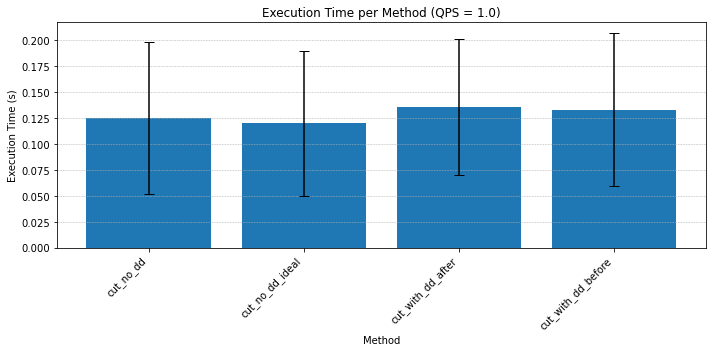

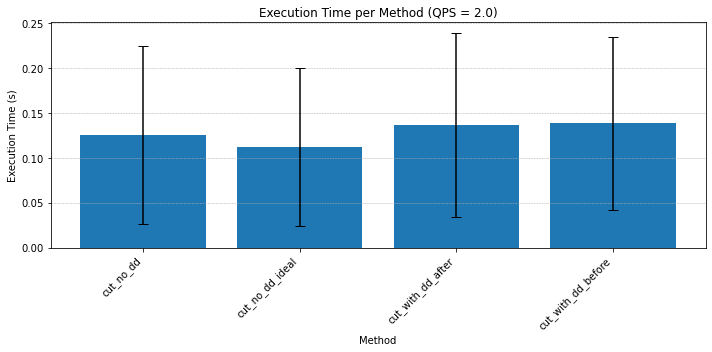

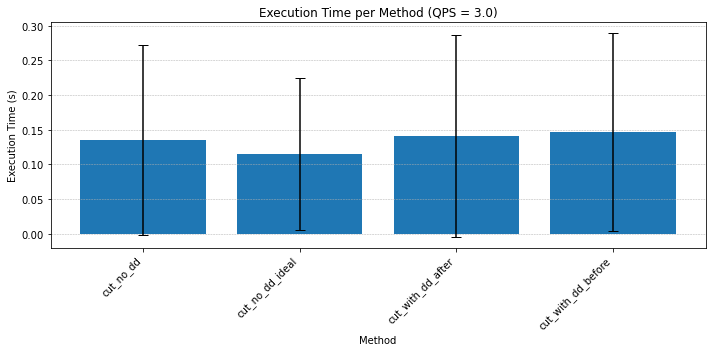

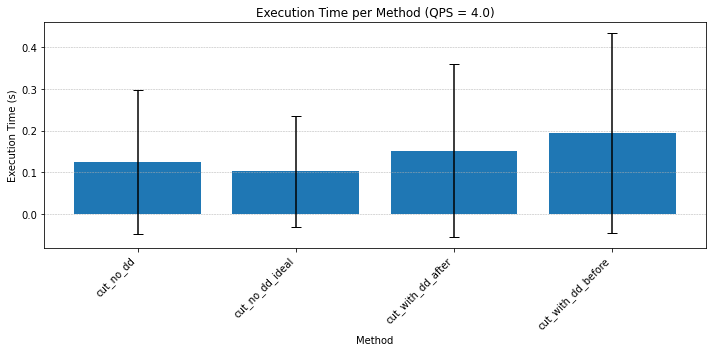

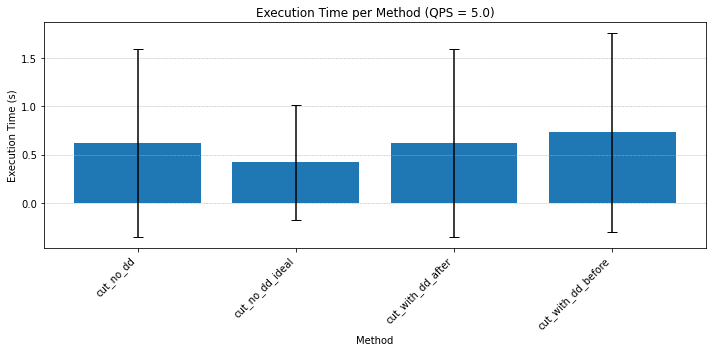

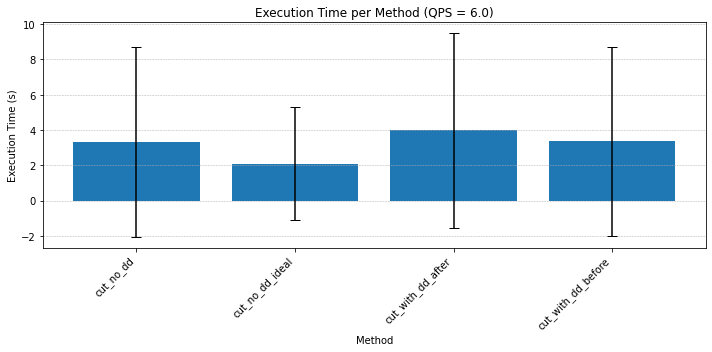

In [23]:
import matplotlib.pyplot as plt
from IPython.display import display

# Get all unique QPS values
qps_values = sorted(log_df["qps"].unique())

# Generate and display a plot per QPS
for qps in qps_values:
    subset = log_df[log_df["qps"] == qps]
    grouped = subset.groupby("method")["exec_secs"].agg(["mean", "std"]).reset_index()

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(
        grouped["method"],
        grouped["mean"],
        yerr=grouped["std"],
        capsize=5
    )

    ax.set_title(f"Execution Time per Method (QPS = {qps})")
    ax.set_xlabel("Method")
    ax.set_ylabel("Execution Time (s)")
    ax.set_xticks(range(len(grouped["method"])))
    ax.set_xticklabels(grouped["method"], rotation=45, ha="right")
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    display(fig)  
    plt.close(fig) 




In [24]:
import pandas as pd

# Load the CSV
df = pd.read_csv("CC+DD - experiment.csv")

# Extract logs with method, exec_secs, and qps
log_entries = []

for _, row in df[["method", "qps", "method, label, submit_time, exec_secs"]].dropna().iterrows():
    qps = row["qps"]
    lines = str(row["method, label, submit_time, exec_secs"]).split("\n")
    for line in lines:
        parts = line.split(",")
        if len(parts) == 4:
            method, label, submit_time, exec_secs = parts
            log_entries.append({
                "method": method.strip(),
                "qps": qps,
                "exec_secs": float(exec_secs.strip())
            })

# Create DataFrame
log_df = pd.DataFrame(log_entries)


In [25]:
import matplotlib.pyplot as plt
import os

# Create directory to save the plots
output_dir = "qps_exec_time_plots"
os.makedirs(output_dir, exist_ok=True)

# Loop over each QPS group
qps_values = sorted(log_df["qps"].unique())

for qps in qps_values:
    subset = log_df[log_df["qps"] == qps]
    grouped = subset.groupby("method")["exec_secs"].agg(["mean", "std"]).reset_index()

    # Plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(
        grouped["method"],
        grouped["mean"],
        yerr=grouped["std"],
        capsize=5
    )

    ax.set_title(f"Execution Time per Method (QPS = {qps})")
    ax.set_xlabel("Method")
    ax.set_ylabel("Execution Time (s)")
    ax.set_xticks(range(len(grouped["method"])))
    ax.set_xticklabels(grouped["method"], rotation=45, ha="right")
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5)

    plt.tight_layout()

    # Save the figure
    filename = f"qps_{int(qps)}.png"
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath)
    plt.close(fig)

    print(f"Saved: {filepath}")


Saved: qps_exec_time_plots/qps_1.png
Saved: qps_exec_time_plots/qps_2.png
Saved: qps_exec_time_plots/qps_3.png
Saved: qps_exec_time_plots/qps_4.png
Saved: qps_exec_time_plots/qps_5.png
Saved: qps_exec_time_plots/qps_6.png


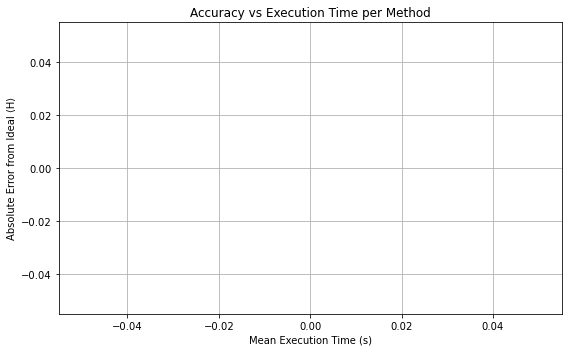

In [26]:
# Step 1: Get ideal value for reference
ideal_val = df[df["method"] == "ideal_cut_no_dd"]["reconstructed expectation value"].dropna().mean()

# Step 2: Build a DataFrame with mean exec time and error per method
accuracy_exec = log_df.groupby("method")["exec_secs"].mean().reset_index()
accuracy_exec.columns = ["method", "mean_exec_time"]

# Add error from ideal
recon_vals = df[["method", "reconstructed expectation value"]].dropna().groupby("method").mean().reset_index()
recon_vals["abs_error"] = (recon_vals["reconstructed expectation value"] - ideal_val).abs()

# Merge
plot_df = pd.merge(accuracy_exec, recon_vals[["method", "abs_error"]], on="method")

# Plot: error vs. exec time
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(plot_df["mean_exec_time"], plot_df["abs_error"], s=100)
for _, row in plot_df.iterrows():
    plt.text(row["mean_exec_time"], row["abs_error"], row["method"], fontsize=9)

plt.xlabel("Mean Execution Time (s)")
plt.ylabel("Absolute Error from Ideal ⟨H⟩")
plt.title("Accuracy vs Execution Time per Method")
plt.grid(True)
plt.tight_layout()
plt.show()


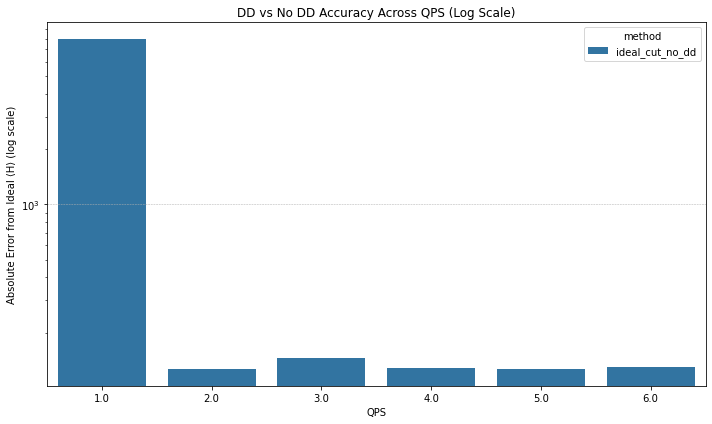

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter and calculate absolute error from ideal
method_vals = df[df["method"].isin([
    "cut_no_dd", "cut_with_dd_before", "cut_with_dd_after", "ideal_cut_no_dd"
])].dropna(subset=["reconstructed expectation value", "qps"])

ideal_val = method_vals[method_vals["method"] == "ideal_cut_no_dd"]["reconstructed expectation value"].mean()
method_vals["abs_error"] = (method_vals["reconstructed expectation value"] - ideal_val).abs()

# Group by method and QPS
dd_qps_comparison = method_vals.groupby(["method", "qps"])["abs_error"].mean().reset_index()

# Plot grouped bars on a log scale
plt.figure(figsize=(10, 6))
sns.barplot(data=dd_qps_comparison, x="qps", y="abs_error", hue="method")

plt.yscale("log")  # 🔍 Set Y-axis to log scale
plt.title("DD vs No DD Accuracy Across QPS (Log Scale)")
plt.ylabel("Absolute Error from Ideal ⟨H⟩ (log scale)")
plt.xlabel("QPS")
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



AttributeError: 'Rectangle' object has no property 'errorbar'

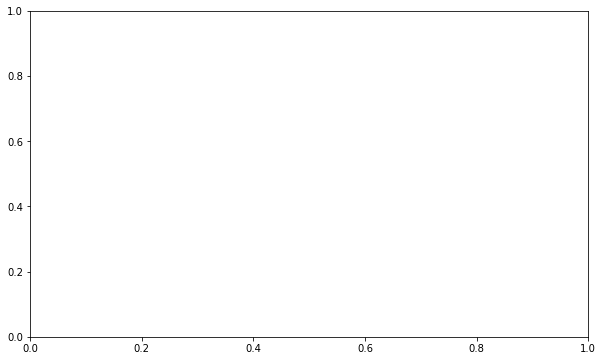

In [28]:
# Grouped bar plot: reconstructed ⟨H⟩ per method and DD type
methods = ["cut_no_dd", "cut_with_dd_before", "cut_with_dd_after", "ideal_cut_no_dd"]
grouped_vals = df[df["method"].isin(methods)].dropna(subset=["reconstructed expectation value"])

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_vals, x="method", y="reconstructed expectation value", hue="qps", errorbar="sd")

plt.title("Reconstructed Expectation Value per Method (Grouped by QPS)")
plt.ylabel("Reconstructed ⟨H⟩")
plt.xlabel("Method")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()


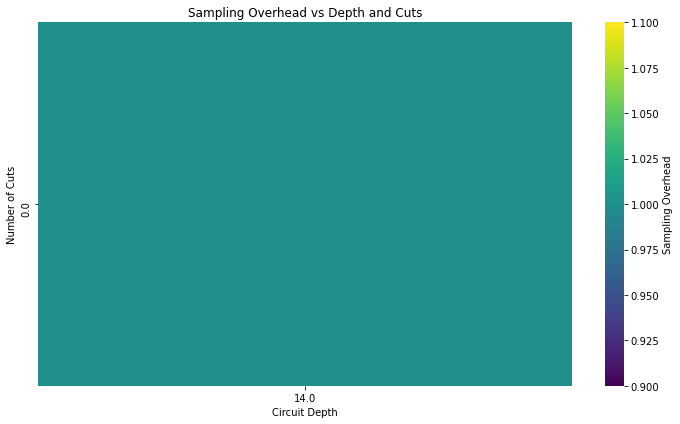

In [29]:
# Prepare pivot table: cuts x depth
heat_df = df.dropna(subset=["sampling_overhead", "cuts", "depth"])
pivot = heat_df.pivot_table(
    values="sampling_overhead", 
    index="cuts", 
    columns="depth", 
    aggfunc="mean"
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="viridis", annot=False, cbar_kws={'label': 'Sampling Overhead'})
plt.title("Sampling Overhead vs Depth and Cuts")
plt.xlabel("Circuit Depth")
plt.ylabel("Number of Cuts")
plt.tight_layout()
plt.show()


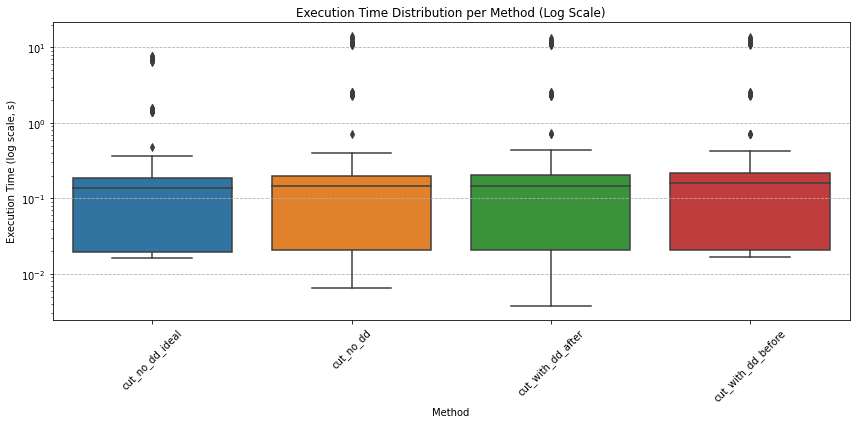

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=log_df, x="method", y="exec_secs")
plt.yscale("log")  # 🔍 Use log scale for better visibility
plt.title("Execution Time Distribution per Method (Log Scale)")
plt.ylabel("Execution Time (log scale, s)")
plt.xlabel("Method")
plt.xticks(rotation=45)
plt.grid(True, axis="y", linestyle="--")
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd

# Load the dataset
df = pd.read_csv("CC+DD - experiment.csv")

# Preview structure and missing data
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   method                                 108 non-null    object 
 1   dd_sequence                            102 non-null    object 
 2   expectation value                      36 non-null     float64
 3   reconstructed expectation value        72 non-null     float64
 4   num_qubits                             108 non-null    float64
 5   qps                                    108 non-null    float64
 6   cuts                                   108 non-null    float64
 7   sampling_overhead                      108 non-null    float64
 8   depth                                  36 non-null     float64
 9   avg_subcircuit_depth                   72 non-null     float64
 10  method, label, submit_time, exec_secs  72 non-null     object 
dtypes: flo

,method,dd_sequence,expectation value,reconstructed expectation value,num_qubits,qps,cuts,sampling_overhead,depth,avg_subcircuit_depth,"method, label, submit_time, exec_secs"
0,ideal_full_no_dd,XY4,0.738421,NaN,7.0,1.0,0.0,1.000000e+00,14.0,NaN,NaN
1,noisy_full_no_dd,XY4,0.765437,NaN,7.0,1.0,0.0,1.000000e+00,14.0,NaN,NaN
2,ideal_cut_no_dd,XY4,NaN,8046.729342,7.0,1.0,12.0,2.824295e+11,NaN,6.0,"cut_no_dd_ideal,0,0.002459287643432617,0.02956..."
3,noisy_cut_no_dd,XY4,NaN,8319.029347,7.0,1.0,12.0,2.824295e+11,NaN,6.0,"cut_no_dd,0,0.002662181854248047,0.02016830444..."
4,noisy_cut_with_dd_after,XY4,NaN,-487.498278,7.0,1.0,12.0,2.824295e+11,NaN,6.0,"cut_with_dd_after,0,0.005754947662353516,0.146..."


In [38]:
# Keep only rows with method, qps, and reconstructed expectation value
df_filtered = df.dropna(subset=["method", "qps", "reconstructed expectation value"]).copy()

# Check what's left
df_filtered[["method", "qps", "reconstructed expectation value"]].head()


,method,qps,reconstructed expectation value
2,ideal_cut_no_dd,1.0,8046.729342
3,noisy_cut_no_dd,1.0,8319.029347
4,noisy_cut_with_dd_after,1.0,-487.498278
5,noisy_cut_with_dd_before,1.0,2901.901379
9,ideal_cut_no_dd,1.0,5154.027753


In [39]:
# Use ideal_cut_no_dd as the reference
ideal_value = df[df["method"] == "ideal_cut_no_dd"]["reconstructed expectation value"].mean()

# Compute absolute error from ideal
df_filtered["abs_error"] = (df_filtered["reconstructed expectation value"] - ideal_value).abs()

# Preview results
df_filtered[["method", "qps", "reconstructed expectation value", "abs_error"]].head()


,method,qps,reconstructed expectation value,abs_error
2,ideal_cut_no_dd,1.0,8046.729342,7919.239659
3,noisy_cut_no_dd,1.0,8319.029347,8191.539664
4,noisy_cut_with_dd_after,1.0,-487.498278,614.987961
5,noisy_cut_with_dd_before,1.0,2901.901379,2774.411696
9,ideal_cut_no_dd,1.0,5154.027753,5026.538070


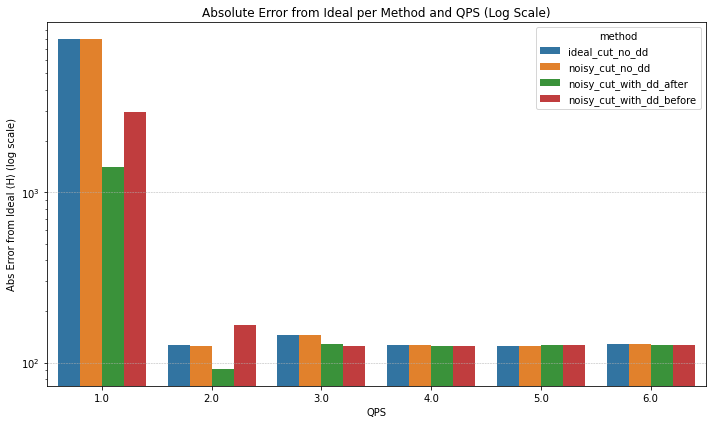

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by method and qps
grouped_error = df_filtered.groupby(["method", "qps"])["abs_error"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_error, x="qps", y="abs_error", hue="method")

plt.yscale("log")
plt.title("Absolute Error from Ideal per Method and QPS (Log Scale)")
plt.ylabel("Abs Error from Ideal ⟨H⟩ (log scale)")
plt.xlabel("QPS")
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


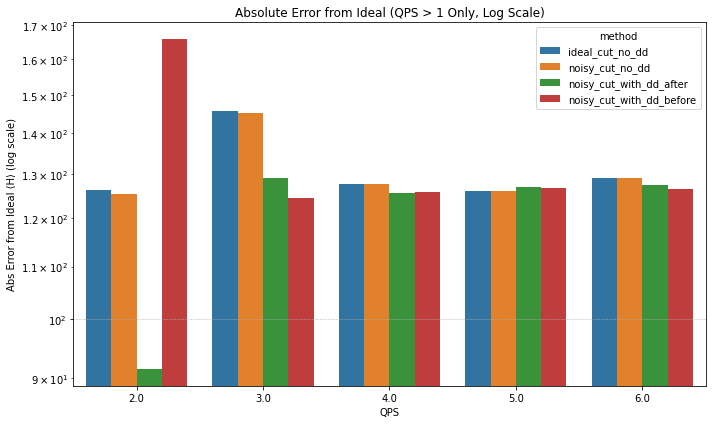

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out QPS = 1
df_filtered_qps = df_filtered[df_filtered["qps"] > 1]

# Group by method and qps
grouped_error = df_filtered_qps.groupby(["method", "qps"])["abs_error"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_error, x="qps", y="abs_error", hue="method")

plt.yscale("log")
plt.title("Absolute Error from Ideal (QPS > 1 Only, Log Scale)")
plt.ylabel("Abs Error from Ideal ⟨H⟩ (log scale)")
plt.xlabel("QPS")
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [42]:
from scipy.stats import mannwhitneyu

# Define method categories
no_dd = df_filtered_qps[df_filtered_qps["method"] == "noisy_cut_no_dd"]["abs_error"]
dd_before = df_filtered_qps[df_filtered_qps["method"] == "noisy_cut_with_dd_before"]["abs_error"]
dd_after = df_filtered_qps[df_filtered_qps["method"] == "noisy_cut_with_dd_after"]["abs_error"]

# Perform tests
u_before = mannwhitneyu(no_dd, dd_before, alternative='two-sided')
u_after = mannwhitneyu(no_dd, dd_after, alternative='two-sided')

print("Mann-Whitney U Test (No-DD vs DD Before):", u_before)
print("Mann-Whitney U Test (No-DD vs DD After):", u_after)


Mann-Whitney U Test (No-DD vs DD Before): MannwhitneyuResult(statistic=130.0, pvalue=0.48073111045562256)
Mann-Whitney U Test (No-DD vs DD After): MannwhitneyuResult(statistic=140.0, pvalue=0.26275304114766074)


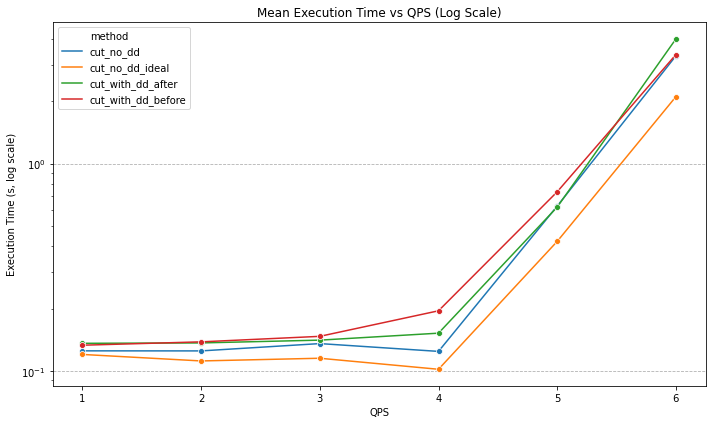

In [43]:
# Group by QPS and method
exec_summary = log_df.groupby(["method", "qps"])["exec_secs"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=exec_summary, x="qps", y="exec_secs", hue="method", marker="o")

plt.yscale("log")
plt.title("Mean Execution Time vs QPS (Log Scale)")
plt.xlabel("QPS")
plt.ylabel("Execution Time (s, log scale)")
plt.grid(True, linestyle='--', axis='y')
plt.tight_layout()
plt.show()


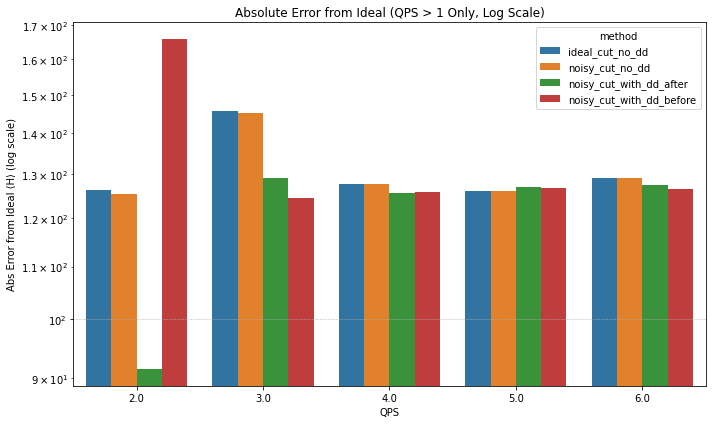

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set new global ideal reference from full circuit
ideal_value = 0.7384207722

# Recalculate absolute error
df_filtered["abs_error"] = (df_filtered["reconstructed expectation value"] - ideal_value).abs()

# Group by method and qps
grouped_error = df_filtered_qps.groupby(["method", "qps"])["abs_error"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_error, x="qps", y="abs_error", hue="method")

plt.yscale("log")
plt.title("Absolute Error from Ideal (QPS > 1 Only, Log Scale)")
plt.ylabel("Abs Error from Ideal ⟨H⟩ (log scale)")
plt.xlabel("QPS")
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [48]:
from scipy.stats import mannwhitneyu

# Set new global ideal reference from full circuit
ideal_value = 0.7384207722

# Filter rows with reconstructed values and QPS > 1
df_filtered_qps = df[(df["qps"] > 1) & (~df["reconstructed expectation value"].isna())].copy()

# Recalculate absolute error from ideal_full_no_dd
df_filtered_qps["abs_error"] = (df_filtered_qps["reconstructed expectation value"] - ideal_value).abs()

# Extract method-specific series
no_dd = df_filtered_qps[df_filtered_qps["method"] == "noisy_cut_no_dd"]["abs_error"]
dd_before = df_filtered_qps[df_filtered_qps["method"] == "noisy_cut_with_dd_before"]["abs_error"]
dd_after = df_filtered_qps[df_filtered_qps["method"] == "noisy_cut_with_dd_after"]["abs_error"]

# Perform statistical tests
u_before = mannwhitneyu(no_dd, dd_before, alternative='two-sided')
u_after = mannwhitneyu(no_dd, dd_after, alternative='two-sided')

# Show results
print("Mann-Whitney U Test (No-DD vs DD Before):", u_before)
print("Mann-Whitney U Test (No-DD vs DD After):", u_after)


Mann-Whitney U Test (No-DD vs DD Before): MannwhitneyuResult(statistic=122.0, pvalue=0.7089232340537643)
Mann-Whitney U Test (No-DD vs DD After): MannwhitneyuResult(statistic=120.0, pvalue=0.7715511878155722)
